In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
#Setting up data
#Happy = pd.read_excel("WHR2018Chapter2OnlineData.xls")
#Happy2018 = Happy[Happy["year"]==2017]
filename = "1817 Sensitivity Analysis.xlsx"
Happy2018 = pd.read_excel(filename)

In [0]:
#@title
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get non-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [0]:
num_cols = get_cols_with_no_nans(Happy2018 , 'num') #we know our data all int/float64
num_cols.remove("Life Ladder") #remove the target
target = pd.DataFrame(Happy2018["Life Ladder"])
predictors = pd.DataFrame(Happy2018[num_cols])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [0]:
#@title
def evaluate_model(model,x_train,x_test,y_train,y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print("Model coefficient: ",model.coef_)
    print("MOdel intercept: ",model.intercept_)
    print(pd.DataFrame(list(zip(x_train.columns, model.coef_[0])),columns = ["Predictors", "Coefficients"]))

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
    
    r2_train,r2_test = r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)
    mse_train,mse_test = mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)
    mae_train,mae_test = mean_absolute_error(y_train,y_train_pred),mean_absolute_error(y_test,y_test_pred)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", r2_train)
    print("Mean Squared Error (MSE) \t:", mse_train)
    print('Mean Absoluate Error (MAE) \t:', mae_train)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", r2_test)
    print("Mean Squared Error (MSE) \t:", mse_test)
    print('Mean Absoluate Error (MAE) \t:', mae_test)
    print()
    
    return [r2_train,mse_train,mae_train],[r2_test,mse_test,mae_test]  #record the accuracy and pass to Pandas Df later

In [0]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target, test_size = 0.25)

In [0]:
#1 Linear Regression
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Model coefficient:  [[ 2.00020949e-02  3.32053232e-01  3.07304614e-01  6.71778425e-02
  -8.97024866e-04  3.08227627e-02 -1.23935379e-01  4.75958833e-02
   7.68483177e-02  9.23144796e-01 -6.36603622e-01 -1.69144397e-02]]
MOdel intercept:  [-0.00551108]
                                           Predictors  Coefficients
0                                  Log GDP per capita      0.020002
1                                      Social support      0.332053
2                    Healthy life expectancy at birth      0.307305
3                        Freedom to make life choices      0.067178
4                                          Generosity     -0.000897
5                           Perceptions of corruption      0.030823
6                                     Positive affect     -0.123935
7                                     Negative affect      0.047596
8                   Confidence in national government      0.076848
9        Standard deviation of ladder by country-year      0.923145


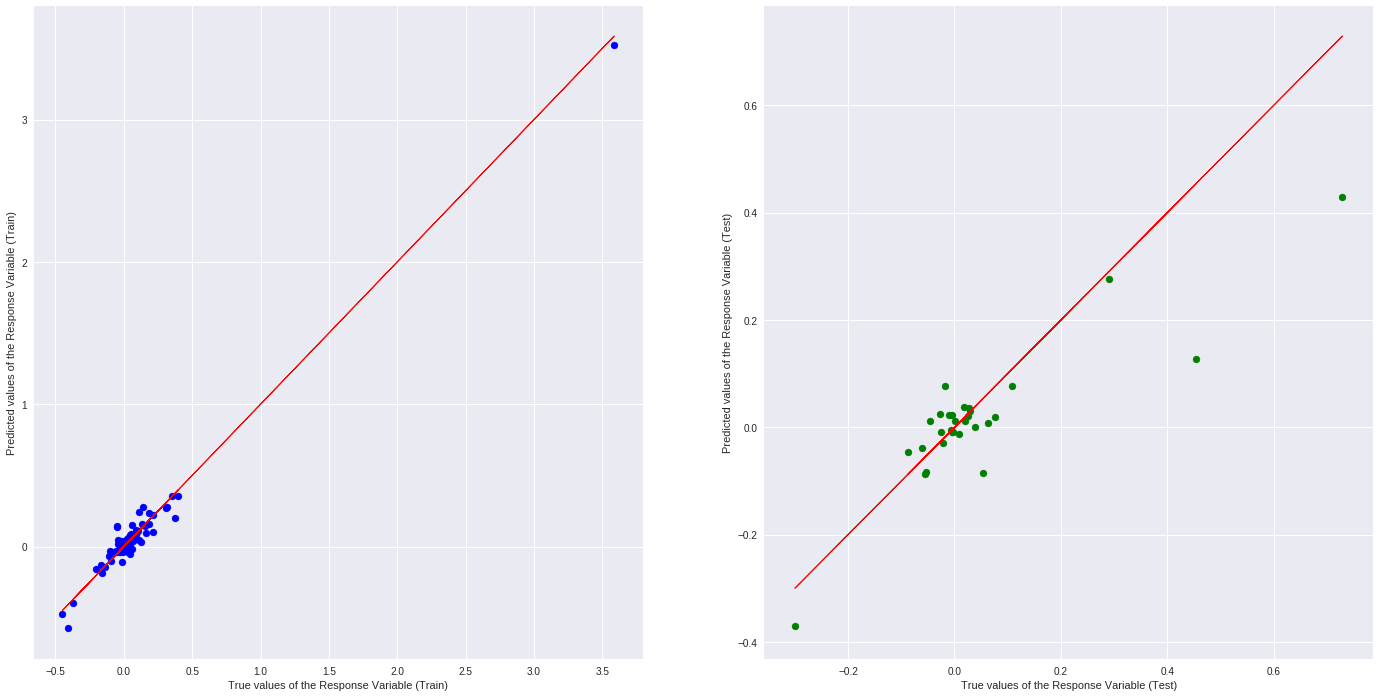

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9788111195853816
Mean Squared Error (MSE) 	: 0.0034437515501362374
Mean Absoluate Error (MAE) 	: 0.04069272653628259

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7236996859232445
Mean Squared Error (MSE) 	: 0.00841435223923628
Mean Absoluate Error (MAE) 	: 0.051064367748305674



In [13]:
a,b = evaluate_model(linreg,x_train,x_test,y_train,y_test)

In [16]:
Happy2018.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.061305,0.003373,-0.004104,0.010754,0.068879,-0.027361,0.014561,-0.022462,0.072844,0.211123,0.079468,0.065801,0.041871
std,0.360445,0.063730,0.123850,0.087116,0.392987,3.962590,0.301607,0.157109,0.450641,1.189808,0.455026,0.434419,0.275110
min,-0.450199,-0.238272,-0.452385,-0.306189,-0.359197,-16.066535,-0.390451,-1.314006,-0.487463,-0.842641,-0.319042,-0.601510,-0.420865
25%,-0.022185,0.000830,-0.030904,0.001850,-0.009583,-0.592579,-0.075220,-0.047446,-0.083455,-0.063766,-0.043047,-0.076564,-0.056872
50%,0.018090,0.002000,-0.005141,0.002907,0.020751,-0.052649,-0.033422,-0.009482,-0.002410,0.050046,0.016501,-0.009082,0.004562
75%,0.067678,0.003719,0.030101,0.006210,0.071762,0.311841,0.017806,0.033961,0.103412,0.212251,0.089076,0.085148,0.087120
max,3.586315,0.401240,0.870149,0.629111,4.029447,24.380563,2.419715,0.363582,4.261353,12.350676,4.648870,3.849348,2.449436


Conclusion: 
Social Support and HLE are too most promising variables that correlate strongly with the change in Life Ladder. 
However, looking at the standard deviation of SS and HLE, we can see that most countries don't vary their HLE by a large margin, whereas there can be a considerable change in SS (possibly due to policy changes)
Therefore it is possible that SS is a good option to change for government. 